## **LETTER RECOGNITION PROBLEM**

### We are working on Letter Recognition dataset, We have to classify the Letters to which type a particular belongs.
### Proposed algorithms for this dataset are:- 1. Decision Tree Classifier, 2. Random Forest Classifier 3. Artificial Neural Network

#### Importing useful libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, log_loss, roc_curve
import matplotlib.pyplot as plt 
from keras.utils import np_utils
import seaborn as sns

#### Loading dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/letter_recog.csv")
df.head()

,letter,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xedge,xegvy,yedge,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### Understading data



### Let's have some basic information about the Letter Recognition dataset  
### **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


##### Label id of type object i.e., a categorical label, therefore, we require label encoding to convert it into int or float type.

### Attribute Information:

1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

#### Checking the number of unique values in Label 'letter'

In [5]:
df['letter'].nunique()

26

Here, we are having 26 type of letter; 26 classes. This is a multivariate dataset in which there are 17 total attributes including target feature

#### Checking for 'NA' values

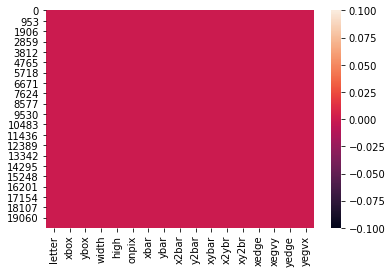

In [6]:
sns.heatmap(df.isna())

Data doesn't carry any missing value as the heatmap is showing any kind of disturbance.

#### Now, let's have some statical info about the dataset we are working upon

In [7]:
df.describe()

,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xedge,xegvy,yedge,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


##### A brief description about Letter Recognition dataset shown above describes the equal value count of each column i.e., 2126. Therefore, the dataset doesn't have any na values.

### Let's explore some features of dataset to have some predictive knowledge

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


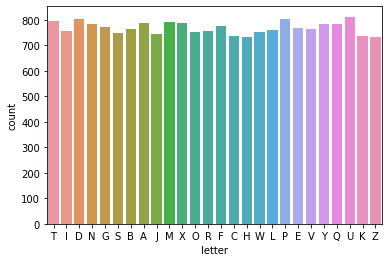

In [8]:
sns.countplot(df['letter'])

The above count plot shows the count of data belonging to each class. 

#### Label 'letter' is of type 'Object', encoding it for better classification

In [9]:
df['letter'] = LabelEncoder().fit_transform(df['letter'])
df.head()

,letter,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xedge,xegvy,yedge,yegvx
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


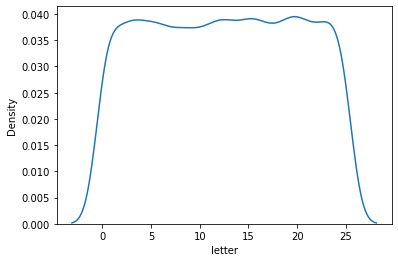

In [10]:
sns.kdeplot(x = df['letter'])

The above plot is showing that the data is normally distributes as the kde curve is not skewed in any particular direction.

#### Visualizing the correlation between attributes

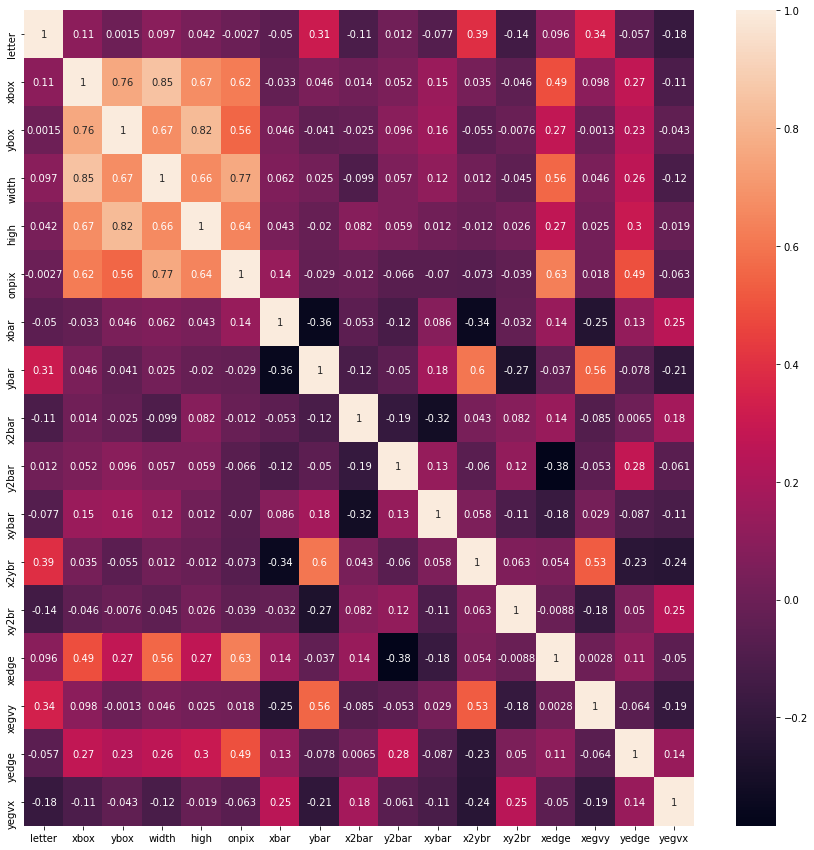

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

Dark squares in the above map shows positive correlation and light squares shows negative correlation.

#### Splitting data into training and testing dataset with ratio 7:3, respectively

In [12]:
X = df.drop("letter", axis=1)
Y = df['letter']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=101, test_size=0.3)

### Preparing our first model

## *   Algorithm used: Decision Tree Classifier




In [13]:
#Instantiating the classifier
model = DecisionTreeClassifier()
#fitting our model with training datasets
model.fit(X_train, Y_train)
prediction = model.predict(X_val)

#Evaluation of result
print("classification report")
print(classification_report(Y_val, prediction))
acc1 = (accuracy_score(Y_val, prediction))
print("f1-score: ",f1_score(Y_val, prediction, average='macro'))
print("log-loss: ",log_loss(Y_val, model.predict_proba(X_val)))

tree_log_loss = log_loss(Y_val, model.predict_proba(X_val))

classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       209
           1       0.76      0.81      0.78       218
           2       0.88      0.88      0.88       230
           3       0.85      0.89      0.87       248
           4       0.86      0.85      0.85       234
           5       0.86      0.79      0.83       225
           6       0.83      0.81      0.82       219
           7       0.77      0.74      0.75       217
           8       0.91      0.87      0.89       215
           9       0.91      0.87      0.89       220
          10       0.85      0.86      0.86       245
          11       0.88      0.89      0.88       237
          12       0.88      0.91      0.90       234
          13       0.91      0.92      0.91       251
          14       0.76      0.83      0.80       221
          15       0.87      0.88      0.88       265
          16       0.85      0.86      0.86       235
     

This model is showing 0.86 score in classification with the accuracy of 0.87

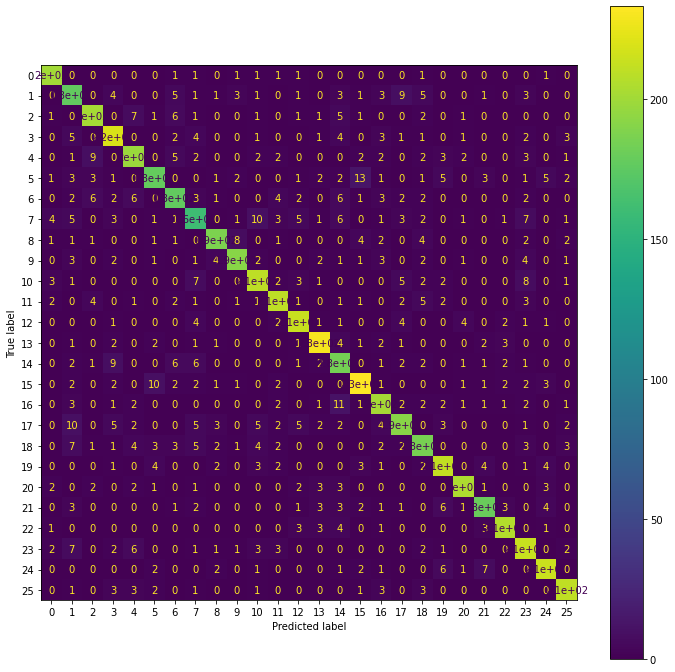

In [14]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(model, X_val, Y_val, ax=ax)

### Preparing our second model

## *   Algorithm used: Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
#Instantiating the classifier
model = RandomForestClassifier()
#fitting our model with training datasets
model.fit(X_train, Y_train)
prediction = model.predict(X_val)

#Evaluation of result
print("classification report")
print(classification_report(Y_val, prediction))
acc2 = (accuracy_score(Y_val, prediction))
print("f1-score",f1_score(Y_val, prediction, average='macro'))
print("log-loss: ",log_loss(Y_val, model.predict_proba(X_val)))

forest_log_loss = log_loss(Y_val, model.predict_proba(X_val))

classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       209
           1       0.90      0.97      0.94       218
           2       0.98      0.96      0.97       230
           3       0.91      0.97      0.94       248
           4       0.97      0.94      0.95       234
           5       0.94      0.94      0.94       225
           6       0.95      0.94      0.94       219
           7       0.90      0.86      0.88       217
           8       0.96      0.90      0.93       215
           9       0.94      0.94      0.94       220
          10       0.94      0.92      0.93       245
          11       0.99      0.97      0.98       237
          12       0.96      1.00      0.98       234
          13       0.98      0.96      0.97       251
          14       0.93      0.97      0.95       221
          15       0.98      0.94      0.96       265
          16       0.92      0.97      0.95       235
     

This model is showing approx. 0.95 F1-score in classification with the accuracy of 0.96 which is comparatively better than Knn Classifier.

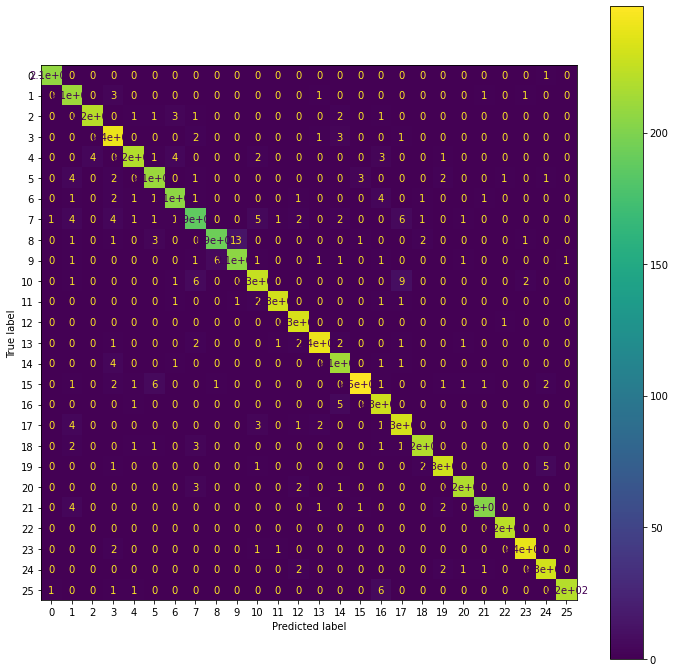

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(model, X_val, Y_val, ax=ax)

This confusion matrix is showing better performance of Random Forest classifier as it shows comparatively lesser False negatives as comparared to Decision Tree classifier.

### Preparing our third model

## *   Algorithm used: Artifitial Neural Network

In [17]:
# Artificial neural network
#converting the label into categorical form
Y  = np_utils.to_categorical(Y)

#preparing a sequential model
model = keras.models.Sequential()

#adding layers to the neural network
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, input_dim = 16, activation='relu'))  #32 nodes for 16 features
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='softmax'))               #26 nodes for different categorical values of label 'letter'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training out neural network model
ArtificialNeuralNetwork=model.fit(X, Y, validation_split=0.2, epochs=50)   

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 2.6453 - accuracy: 0.2911 - val_loss: 1.2788 - val_accuracy: 0.6215
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 1.1211 - accuracy: 0.6724 - val_loss: 0.9416 - val_accuracy: 0.7308
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.8492 - accuracy: 0.7521 - val_loss: 0.7902 - val_accuracy: 0.7730
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.7256 - accuracy: 0.7851 - val_loss: 0.6763 - val_accuracy: 0.7905
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6250 - accuracy: 0.8100 - val_loss: 0.6150 - val_accuracy: 0.8115
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.8293 - val_loss: 0.5580 - val_accuracy: 0.8265
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4848 - accuracy: 0.8507 - val_loss: 0.5480 - val_accuracy: 0.8270
Epoch 

The ANN is having loss less than 1(near to 0) in training as well as validation and showing the accuracy of approx 96%. As the loss in minimum and the accuracy is excellent, we can say that this model performed better than other two models.

#### Performance graph of Neural network

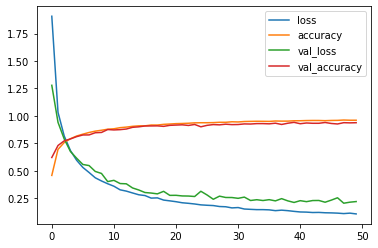

In [18]:
#neural netowrk performance plot
pd.DataFrame(ArtificialNeuralNetwork.history).plot()

### Brief summary of model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 16)                  0         
_________________________________________________________________
dense (Dense)                (32, 32)                  544       
_________________________________________________________________
dense_1 (Dense)              (32, 64)                  2112      
_________________________________________________________________
dense_2 (Dense)              (32, 64)                  4160      
_________________________________________________________________
dense_3 (Dense)              (32, 26)                  1690      
Total params: 8,506
Trainable params: 8,506
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (32, 16),
    'dtype': 'int64',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 16),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 32,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class

In [23]:
acc3 = ArtificialNeuralNetwork.history['accuracy'][-1]

#### Performance and comparison of different models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


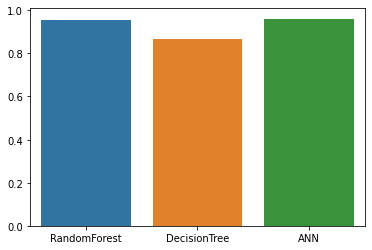

In [24]:
sns.barplot(['RandomForest', 'DecisionTree', 'ANN'], [acc2, acc1, acc3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


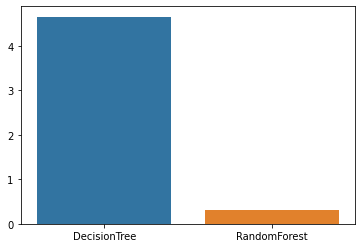

In [25]:
sns.barplot(['DecisionTree', 'RandomForest'], [tree_log_loss, forest_log_loss])

Log_loss of Random Forest Classifier is very less.

## CONCLUSION




#### Observing the above plots, it can be concluded that Random Forest classifier and ANN worked excellently better as compared to Decision Tree classifier. The Accuracy of Random Forest Classifier is observed as 96% and ANN's accuracy comes out to be 96% which is same. And, the loss of model these models are observed to be closer to 0 which is quite good whereas the loss of Decision Tree classifier is approximately 4 which is not good. 
#### **Therefore, ANN and Random Forest classifier can be chosen for classification for this dataset. ANN worked best with 96% training accuracy and 0.1 loss.**